In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

In [3]:
df=pd.read_csv('height-weight.csv')

In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


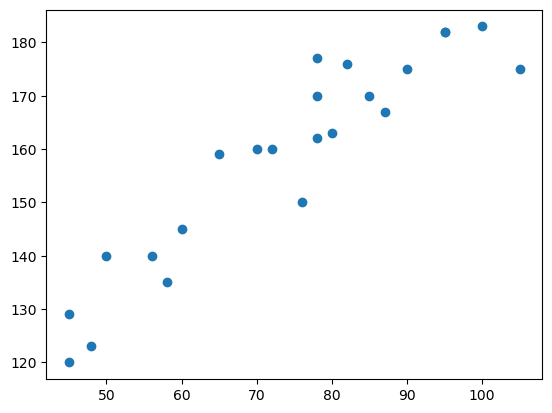

In [5]:
plt.scatter(df['Weight'], df['Height'])
plt.show()

In [6]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


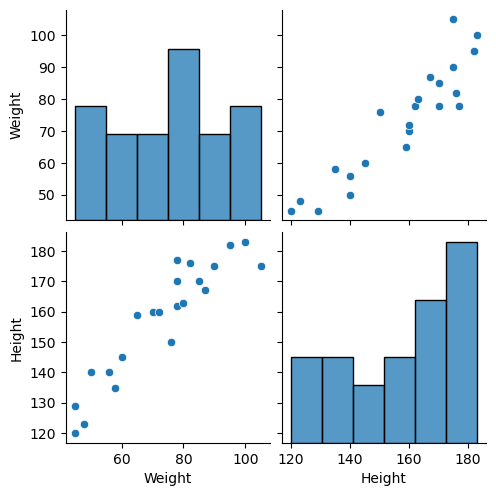

<Figure size 1000x600 with 0 Axes>

In [7]:
import seaborn as sns
sns.pairplot(df)
plt.figure(figsize=(10, 6))
plt.show()

In [8]:
X=df[['Weight']] #independent features should be in 2D array
y=df['Height'] #dependent feature can be in 1D array or series
X.head()

,Weight
0,45
1,58
2,48
3,60
4,70


In [9]:
np.array(y).shape

(23,)

In [10]:
## train test split
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets (75% train, 25% test) with a fixed random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [11]:
X_train.shape

(17, 1)

In [12]:
##standardization
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
# Standardization is important to bring all features to the same scale, which helps many machine learning algorithms perform better
# For example, algorithms like gradient descent converge faster and models like k-nearest neighbors or SVMs are sensitive to the scale of input features.
# Here, we standardize the 'Weight' feature so that it has a mean of 0 and a standard deviation of 1.
X_train = scaler.fit_transform(X_train)  # Fit and transform the training data

In [14]:
X_test = scaler.transform(X_test)  # Transform the test data using the same scaler


In [15]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [16]:
#apply linear regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [17]:
print("Model coefficients:", regressor.coef_)
print("Model intercept:", regressor.intercept_)

Model coefficients: [17.2982057]
Model intercept: 156.47058823529412


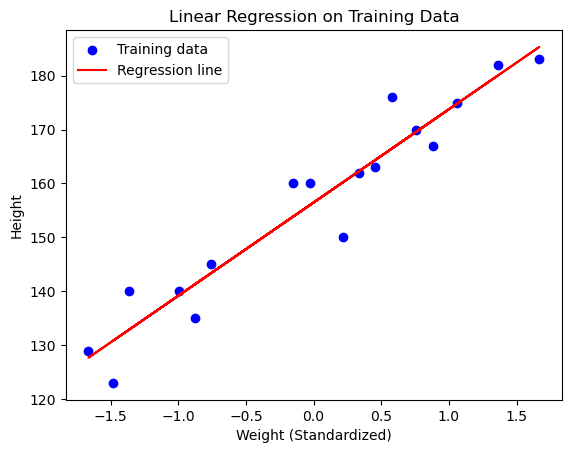

In [19]:
##plot training data and regression line
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.plot(X_train, regressor.predict(X_train), color='red', label='Regression line')
plt.xlabel('Weight (Standardized)')
plt.ylabel('Height')
plt.title('Linear Regression on Training Data')
plt.legend()
plt.show()

In [20]:
##predicting on test data
y_pred = regressor.predict(X_test)

In [21]:
##performance evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(y_test, y_pred)
mae= mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)  

Mean Squared Error: 114.84069295228699
Mean Absolute Error: 9.665125886795005
Root Mean Squared Error: 10.716374991212605


In [ ]:
##rsquare formula
# R-squared (coefficient of determination) measures how well the regression predictions approximate the real data points.
# It represents the proportion of the variance in the dependent variable that is predictable from the independent variable(s).
# Adjusted R-squared adjusts the R-squared value based on the number of predictors in the model, providing a more accurate measure for multiple regression.

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)



R-squared: 0.7360826717981276


In [24]:
##OLS regression
import statsmodels.api as sm
model=sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test)
print(predictions)
print(model.summary())
# The summary provides detailed statistics about the regression model, including coefficients, R-squared values,

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]
                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Sun, 10 Aug 2025   Prob (F-statistic):                       0.664
Time:                        01:00:46   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err       

c:\Users\Admin\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


In [27]:
##predicting on new data
regressor.predict(scaler.transform([[79]]))  # Predicting height for a weight of 72 kg
# The model predicts the height based on the weight input, which can be useful for estimating heights in practical scenarios.       
# The output will be the predicted height for the given weight, based on the trained linear regression model.
# This can be used to understand how weight influences height according to the model.


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([163.31292223])